# **Input Data**

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

from glob import glob
import IPython.display
import PIL.Image

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.metrics import roc_auc_score, confusion_matrix

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential, model_from_json
from tensorflow.python.keras.utils import np_utils
import cv2

from sklearn import *

#load data

X_train = np.load('/content/drive/My Drive/Input/X_train_array.npy')
X_test = np.load('/content/drive/My Drive/Input/X_test_array.npy')
X_val = np.load('/content/drive/My Drive/Input/X_val_array.npy')

y_train = np.load('/content/drive/My Drive/Input/y_train_array.npy')
y_test = np.load('/content/drive/My Drive/Input/y_test_array.npy')
y_val = np.load('/content/drive/My Drive/Input/y_val_array.npy')

# define an empty sequential structure 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


# Model 1

W0828 21:55:57.778742 140700642756480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 21:55:57.889568 140700642756480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 21:55:57.916991 140700642756480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 21:55:57.974049 140700642756480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0828 21:55:57.981569 140700642756480 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
__________

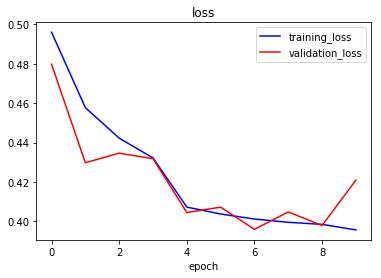

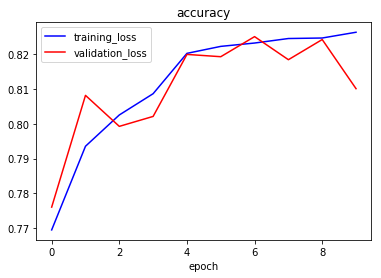

Loss = 0.394616
Accuracy: 0.822890
Precision: 0.780712
Recall: 0.783165
F1 score: 0.781936
Cohens kappa: 0.632830
ROC AUC: 0.816573
Confusion matrix:
[[11105  1960]
 [ 1932  6978]]


In [0]:
model = Sequential()
#first Convolutive layer - you choose parameters for Convolute filter (32, (3,3)). Input shape should be reversed and used as (96,96,3) 
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# some more layers added - how many should be - I don't know, you should balance between precision and overfitting
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_1.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
__________

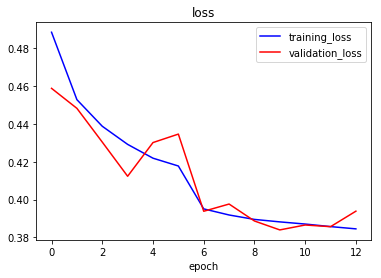

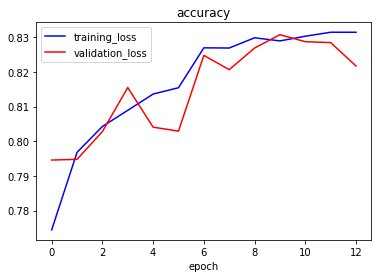

Loss = 0.383021
Accuracy: 0.828168
Precision: 0.784716
Recall: 0.794052
F1 score: 0.789356
Cohens kappa: 0.644268
ROC AUC: 0.822743
Confusion matrix:
[[11124  1941]
 [ 1835  7075]]


In [0]:
model = Sequential()
#first Convolutive layer - you choose parameters for Convolute filter (32, (3,3)). Input shape should be reversed and used as (96,96,3) 
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# some more layers added - how many should be - I don't know, you should balance between precision and overfitting
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_2.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
__________

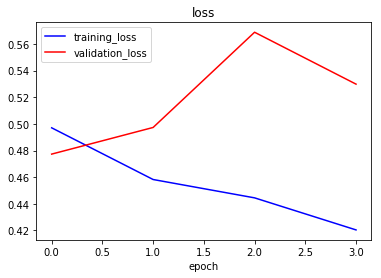

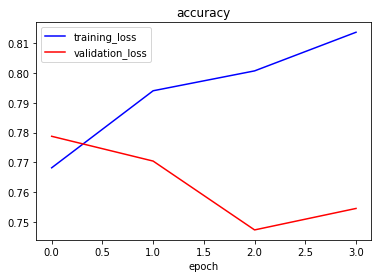

Loss = 0.474557
Accuracy: 0.782207
Precision: 0.706862
Recall: 0.790797
F1 score: 0.746477
Cohens kappa: 0.556636
ROC AUC: 0.783573
Confusion matrix:
[[10143  2922]
 [ 1864  7046]]


In [0]:
model = Sequential()
#first Convolutive layer - you choose parameters for Convolute filter (32, (3,3)). Input shape should be reversed and used as (96,96,3) 
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# some more layers added - how many should be - I don't know, you should balance between precision and overfitting
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=64,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_3.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 4

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 32)        9248      
__________

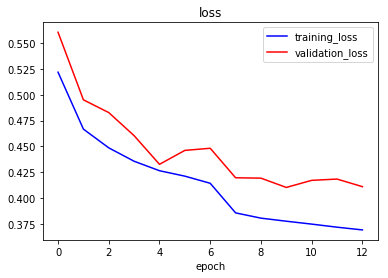

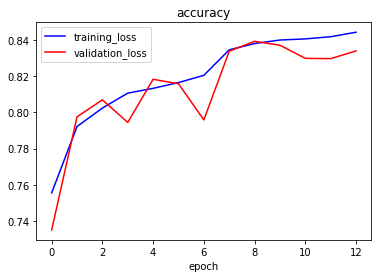

Loss = 0.410077
Accuracy: 0.837452
Precision: 0.804125
Recall: 0.792031
F1 score: 0.798032
Cohens kappa: 0.662042
ROC AUC: 0.830229
Confusion matrix:
[[11346  1719]
 [ 1853  7057]]


In [6]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.4))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_4.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 5

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 32)        9248      
__________

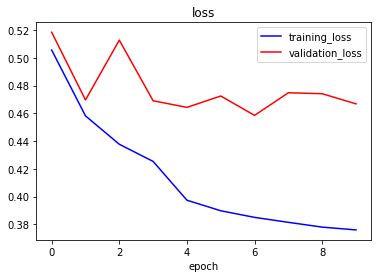

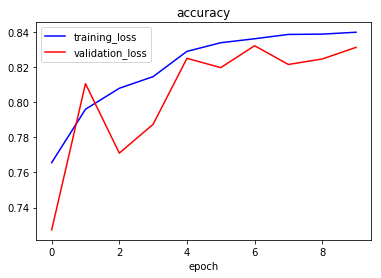

Loss = 0.458562
Accuracy: 0.829579
Precision: 0.781104
Recall: 0.805387
F1 score: 0.793060
Cohens kappa: 0.648260
ROC AUC: 0.825732
Confusion matrix:
[[11054  2011]
 [ 1734  7176]]


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = 3)) 

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.4))

# adding last layers - flattening and Dence
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model5.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_5.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 6

W0829 08:41:51.943442 139755130656640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 08:41:52.030778 139755130656640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 08:41:52.052868 139755130656640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 08:41:52.119138 139755130656640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0829 08:41:52.120189 1397551306

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
__________

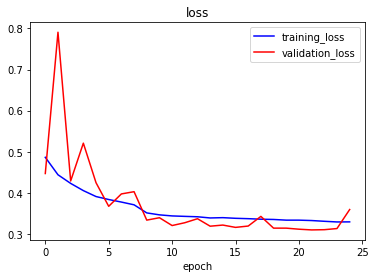

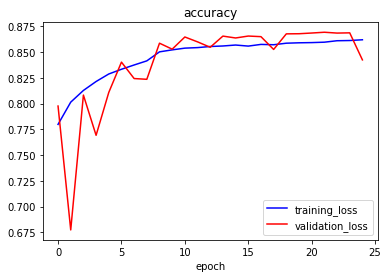

Loss = 0.307735
Accuracy: 0.868896
Precision: 0.864466
Recall: 0.802469
F1 score: 0.832315
Cohens kappa: 0.724934
ROC AUC: 0.858334
Confusion matrix:
[[11944  1121]
 [ 1760  7150]]


In [2]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))

# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_6.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 7

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
__________

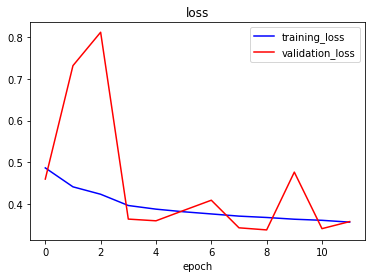

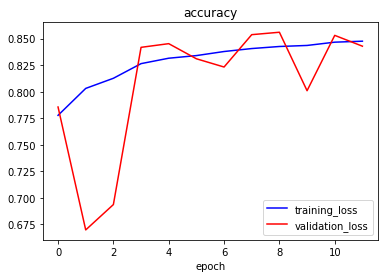

Loss = 0.335103
Accuracy: 0.855882
Precision: 0.828961
Recall: 0.812121
F1 score: 0.820455
Cohens kappa: 0.700108
ROC AUC: 0.848923
Confusion matrix:
[[11572  1493]
 [ 1674  7236]]


In [3]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))

# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model7.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_7.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        9248      
__________

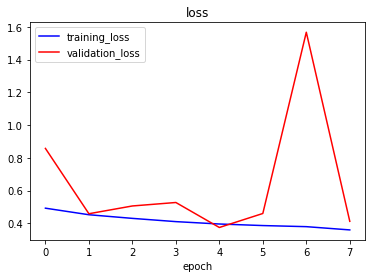

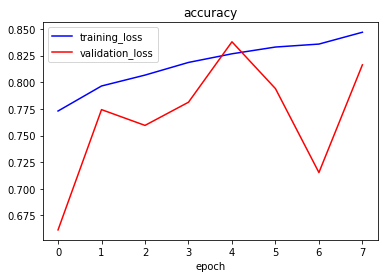

Loss = 0.374418
Accuracy: 0.838498
Precision: 0.801485
Recall: 0.799776
F1 score: 0.800629
Cohens kappa: 0.664907
ROC AUC: 0.832341
Confusion matrix:
[[11300  1765]
 [ 1784  7126]]


In [4]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))

# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model8.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_8.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 9

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        9248      
__________

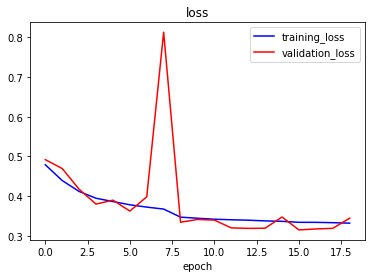

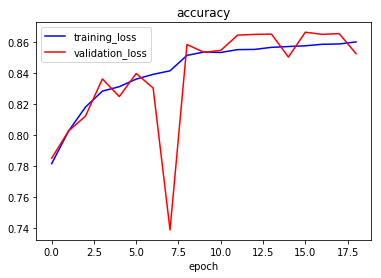

Loss = 0.314060
Accuracy: 0.866712
Precision: 0.869061
Recall: 0.790348
F1 score: 0.827838
Cohens kappa: 0.719501
ROC AUC: 0.854569
Confusion matrix:
[[12004  1061]
 [ 1868  7042]]


In [5]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model9.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_9.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 32)        9248      
__________

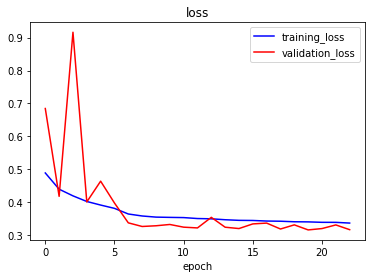

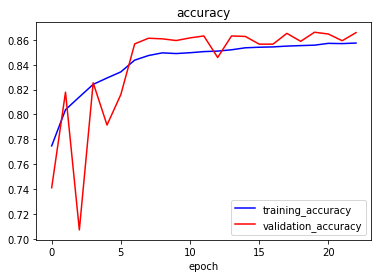

Loss = 0.315249
Accuracy: 0.864437
Precision: 0.862309
Recall: 0.792144
F1 score: 0.825739
Cohens kappa: 0.715136
ROC AUC: 0.852941
Confusion matrix:
[[11938  1127]
 [ 1852  7058]]


In [8]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.01, patience=2, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model10.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_10.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Model 11

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 32)        9248      
__________

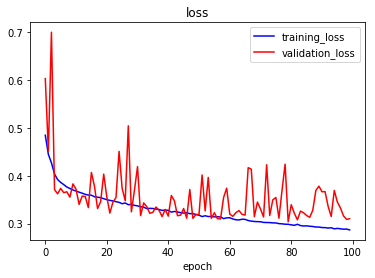

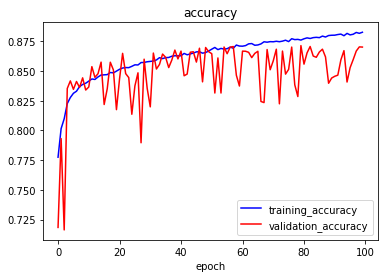

Loss = 0.304727
Accuracy: 0.869534
Precision: 0.837485
Recall: 0.841526
F1 score: 0.839501
Cohens kappa: 0.729600
ROC AUC: 0.865080
Confusion matrix:
[[11610  1455]
 [ 1412  7498]]


In [9]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.001, patience=1, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model11.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_11.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# **Model 12**

In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.001, patience=1, verbose=1, min_lr=0.0001)
mc = ModelCheckpoint('model12.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_12.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

W0829 19:22:25.950603 139908963661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 19:22:26.016380 139908963661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 19:22:26.041649 139908963661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 19:22:26.107458 139908963661696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0829 19:22:26.108811 1399089636

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
__________